In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

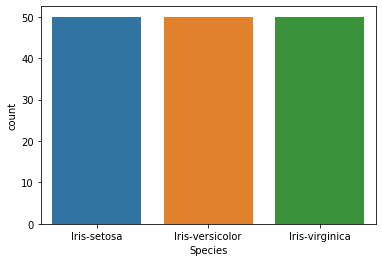

In [6]:
sns.countplot(x="Species", data = df)

In [7]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

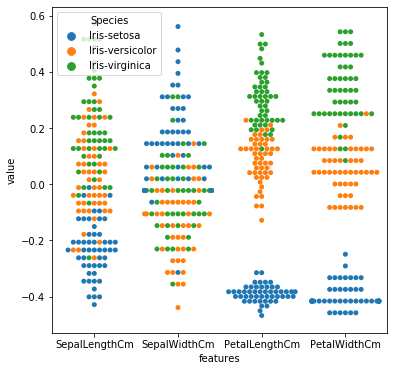

In [8]:
data = X
data_std = (data - data.mean())/(data.max() - data.min())
data = pd.concat([data_std,y], axis=1)
data = pd.melt(data, id_vars = 'Species', var_name = 'features',
                value_name = 'value')
plt.figure(figsize = (6,6))
sns.swarmplot(x = 'features', y = 'value', hue = 'Species', data = data)
plt.show()

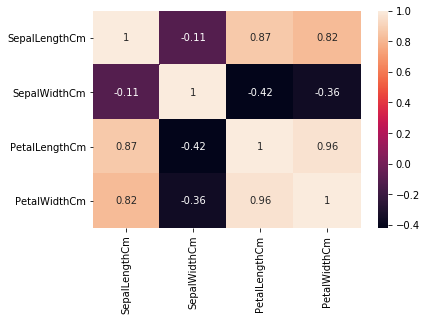

In [9]:
sns.heatmap(X.corr(), annot=True)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (112, 4) (112,)
Testing set shape:  (38, 4) (38,)


In [11]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [12]:
ft = SelectKBest(chi2, k= 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [ 9.17942135  2.38729628 89.33693113 51.91944934]
Columns:  Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [13]:
ft = SelectKBest(f_classif, k= 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [ 97.40415147  28.70153517 890.49613042 763.18137566]
Columns:  Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [14]:
X_train_2 = ft.transform(X_train)
X_test_2 = ft.transform(X_test)

In [15]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train_2).transform(X_train_2.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test_2).transform(X_test_2.astype(float))

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
from sklearn import metrics

In [18]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.94736842, 0.94736842, 0.94736842, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.94736842, 0.97368421, 0.94736842, 0.94736842])

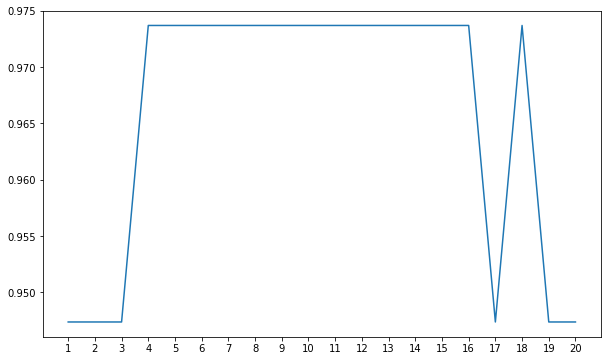

In [19]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [22]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [23]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.6s finished


In [24]:
g_res.best_score_

0.9556661925082978

In [25]:
g_res.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

In [27]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
y_knn = knn.predict(X_test)

In [29]:
metrics.accuracy_score(y_test, y_knn)

0.9736842105263158

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv = 5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [33]:
np.mean(scores)

0.9733333333333334

In [34]:
pickle.dump(knn,open('iris.pkl','wb'))

In [7]:
import pandas as pd 
  
# Define a dictionary containing Students data 
data = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Height': [5.1, 6.2, 5.1, 5.2], 
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']} 
  
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data) 
  
# Declare a list that is to be converted into a column 
address = ['Delhi', 'Bangalore', 'Delhi', 'Patna'] 
  
# Using 'Address' as the column name 
# and equating it to the list 
df['Address'] = address 
  
# Observe the result 
df 

,Name,Height,Qualification,Address
0,Jai,5.1,Msc,Delhi
1,Princi,6.2,MA,Bangalore
2,Gaurav,5.1,Msc,Delhi
3,Anuj,5.2,Msc,Patna


In [8]:
df['new'] = 0

In [9]:
df

,Name,Height,Qualification,Address,new
0,Jai,5.1,Msc,Delhi,0
1,Princi,6.2,MA,Bangalore,0
2,Gaurav,5.1,Msc,Delhi,0
3,Anuj,5.2,Msc,Patna,0


In [10]:
cleanup_nums = {"Address" : {"Delhi":1,"Bangalore":2,"Chennai":3,"Patna":4}}

In [11]:
df.replace(cleanup_nums, inplace=True)
df.head()

,Name,Height,Qualification,Address,new
0,Jai,5.1,Msc,1,0
1,Princi,6.2,MA,2,0
2,Gaurav,5.1,Msc,1,0
3,Anuj,5.2,Msc,4,0
